In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/waterQuality2 - waterQuality1.csv')

In [ ]:
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
data.info

<bound method DataFrame.info of       aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates 

In [ ]:
data.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

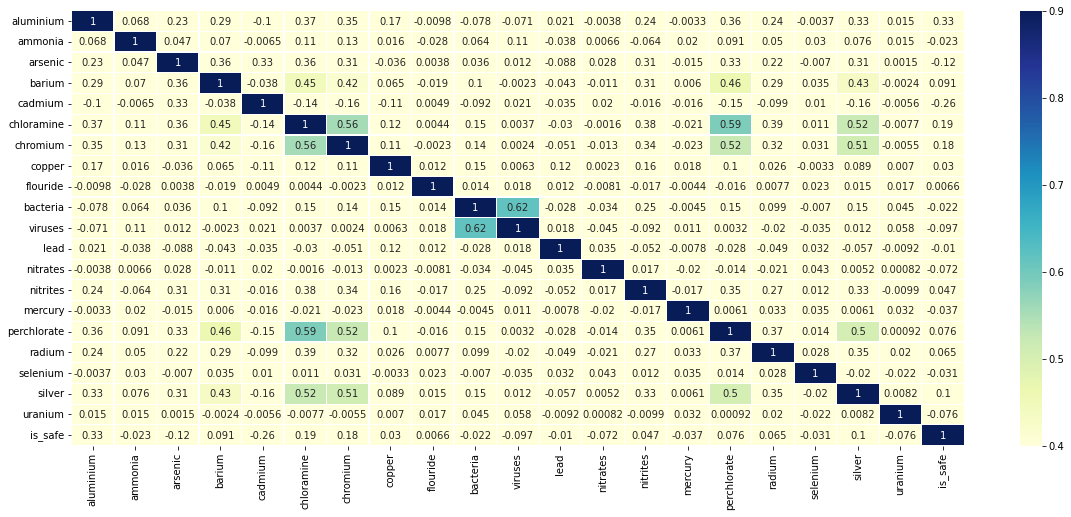

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [ ]:
y=data['is_safe']
X=data.drop('is_safe',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn import linear_model
lr=linear_model.LogisticRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(y_test)

4017    0
2577    0
3693    0
6574    0
7566    0
       ..
2913    0
1115    0
6759    0
6737    0
1467    0
Name: is_safe, Length: 1600, dtype: int64


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSC is:',mean_squared_error(y_test,predictions))

MSC is: 0.1025


In [ ]:
from sklearn.metrics import r2_score
print('R squared value is :',r2_score(y_test,predictions))

R squared value is : 0.06285714285714283


In [ ]:
X.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.272857,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,8.881569,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.560000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
from sklearn import preprocessing
standards=preprocessing.StandardScaler()
X=standards.fit_transform(X)

In [ ]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7.999000e+03,7.999000e+03,7.999000e+03,7999.000000,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03,7999.000000,7.999000e+03,7.999000e+03,7.999000e+03,7999.000000,7.999000e+03,7.999000e+03,7.999000e+03,7.999000e+03
mean,-1.705516e-16,7.106316e-17,5.685053e-17,0.000000,-2.842526e-16,-5.685053e-17,-1.137011e-16,-2.842526e-17,9.815598e-17,-5.685053e-17,9.948842e-17,0.000000,-2.282904e-16,-3.126779e-16,-6.728793e-17,0.000000,5.685053e-17,-2.151881e-16,1.137011e-16,-2.409485e-16
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063,1.000063e+00,1.000063e+00,1.000063e+00,1.000063,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-5.265798e-01,-1.616128e+00,-6.391978e-01,-1.289223,-1.187503e+00,-8.480497e-01,-9.135419e-01,-1.233143e+00,-1.772306e+00,-9.702550e-01,-8.691004e-01,-1.709690,-1.772036e+00,-2.320306e+00,-1.750507e+00,-0.930677,-1.257305e+00,-1.727085e+00,-1.029530e+00,-1.660571e+00
25%,-4.949609e-01,-8.684658e-01,-5.204211e-01,-0.828702,-9.655714e-01,-8.090917e-01,-7.287834e-01,-1.095423e+00,-8.420100e-01,-9.702550e-01,-8.638104e-01,-0.884498,-8.696689e-01,-5.756642e-01,-7.393643e-01,-0.807984,-9.042923e-01,-1.031870e+00,-7.508665e-01,-9.171387e-01
50%,-4.712467e-01,-1.608562e-02,-4.412366e-01,-0.310617,-7.784528e-02,-6.415724e-01,-5.809766e-01,-8.547381e-02,-3.595296e-03,-3.025056e-01,-8.479404e-01,0.043844,2.006460e-02,1.570854e-01,-6.526901e-02,-0.493052,-2.197923e-01,1.095099e-02,-4.722027e-01,1.980101e-01
75%,-3.052475e-01,8.847124e-01,-2.432753e-01,0.750225,7.543980e-01,8.037694e-01,7.123332e-01,8.938709e-01,8.922451e-01,8.812321e-01,9.823971e-01,0.886228,8.646798e-01,7.502635e-01,9.458740e-01,0.736143,7.531448e-01,7.061652e-01,6.424527e-01,9.414427e-01
max,3.465306e+00,1.752857e+00,3.517989e+00,2.773226,2.418885e+00,2.533505e+00,2.412112e+00,1.827309e+00,1.673234e+00,2.064970e+00,1.775896e+00,1.728612,1.806751e+00,2.791494e+00,1.619969e+00,2.462331,2.182415e+00,1.748987e+00,2.453768e+00,1.684875e+00


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42,test_size=0.2)
lr=linear_model.LogisticRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE IS :',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,prediction))

MSE IS : 0.098125
R squared value is : 0.10285714285714287


In [ ]:
X=data.drop('is_safe',axis=1)
X.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.272857,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,8.881569,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.560000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [ ]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.131913,0.479708,0.153757,0.317351,0.329278,0.250787,0.274695,0.402928,0.514377,0.319665,0.328583,0.497248,0.495150,0.453912,0.519365,0.274293,0.365525,0.496850,0.295562,0.496368
std,0.250524,0.296844,0.240562,0.246172,0.277303,0.295740,0.300712,0.326770,0.290248,0.329485,0.378096,0.290859,0.279442,0.195638,0.296712,0.294742,0.290740,0.287699,0.287102,0.298932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007921,0.221925,0.028571,0.113360,0.061538,0.011521,0.055556,0.045000,0.270000,0.000000,0.002000,0.240000,0.252143,0.341297,0.300000,0.036161,0.102628,0.200000,0.080000,0.222222
50%,0.013861,0.474933,0.047619,0.240891,0.307692,0.061060,0.100000,0.375000,0.513333,0.220000,0.008000,0.510000,0.500756,0.484642,0.500000,0.128979,0.301627,0.500000,0.160000,0.555556
75%,0.055446,0.742313,0.095238,0.502024,0.538462,0.488479,0.488889,0.695000,0.773333,0.610000,0.700000,0.755000,0.736762,0.600683,0.800000,0.491251,0.584481,0.700000,0.480000,0.777778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LogisticRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE IS :',mean_squared_error(y_test,predictions))
print('R squared value is :',r2_score(y_test,prediction))

MSE IS : 0.1025
R squared value is : 0.09142857142857141


In [ ]:
X=data.drop('is_safe',axis=1)
X.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.272857,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,8.881569,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.560000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [ ]:
X=pd.DataFrame(X)
X.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.272857,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,8.881569,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.560000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LogisticRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE IS :',mean_squared_error(y_test,predictions))
print('R squared value is :',r2_score(y_test,predictions))

MSE IS : 0.1025
R squared value is : 0.06285714285714283


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


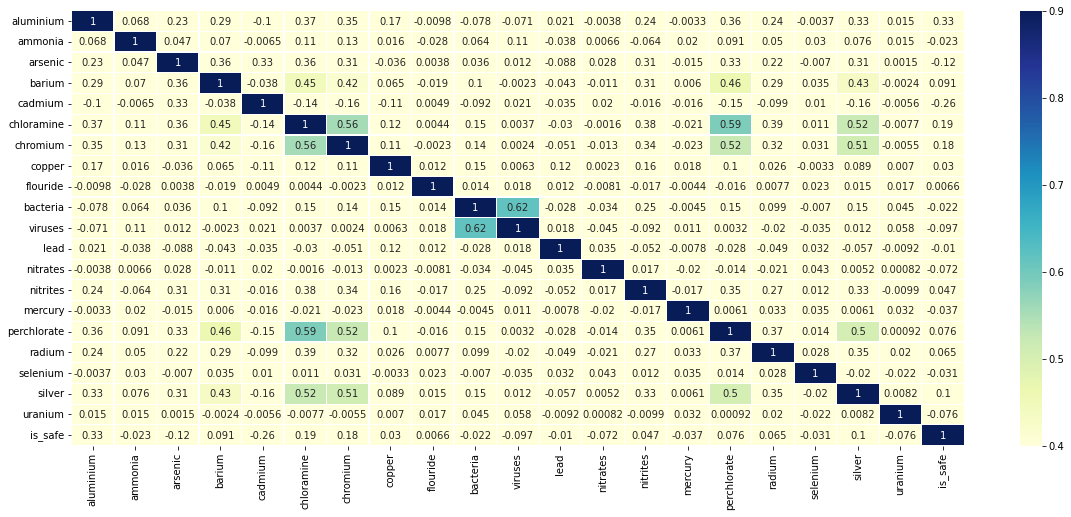

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [ ]:
data.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [ ]:
data.drop(['chloramine','chromium','bacteria','viruses'],axis=1,inplace=True)

In [ ]:
y=data['is_safe']
X=data.drop('is_safe',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LogisticRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE IS :',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,predictions))

MSE IS : 0.111875
R squared value is : 0.06285714285714283


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
